In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.11.0


In [26]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
len(train_labels)

60000

In [30]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
len(test_labels)

10000

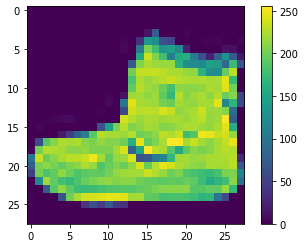

In [33]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
train_images = train_images/255.0
test_images = test_images/255.0

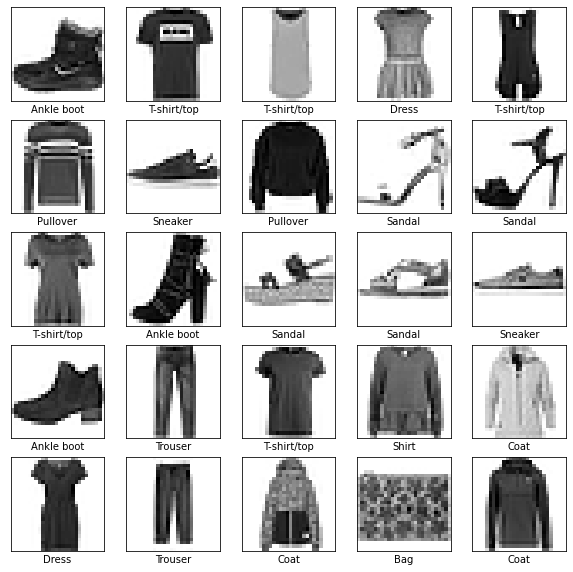

In [35]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.fit(train_images, train_labels, epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4995 - accuracy: 0.8249
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3755 - accuracy: 0.8640
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3361 - accuracy: 0.8765
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3121 - accuracy: 0.8863
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2937 - accuracy: 0.8924
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.8965
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2639 - accuracy: 0.9027
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2567 - accuracy: 0.9040
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2445 - accuracy: 0.9084
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

In [39]:
test_loss, test_acc =  model.evaluate(test_images, test_labels, verbose = 2)
print('\n Test accuracy: ', test_acc)

313/313 - 1s - loss: 0.3899 - accuracy: 0.8919 - 800ms/epoch - 3ms/step

 Test accuracy:  0.8919000029563904


In [40]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [41]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [42]:
predictions[0]

array([3.57923829e-11, 1.06043083e-15, 6.71374704e-15, 5.28470475e-20,
       2.38328271e-14, 1.25537042e-06, 1.11539576e-10, 5.73147030e-04,
       2.00828399e-11, 9.99425650e-01], dtype=float32)

In [43]:
np.argmax(predictions[0])

9

In [44]:
test_labels[0]

9

In [45]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

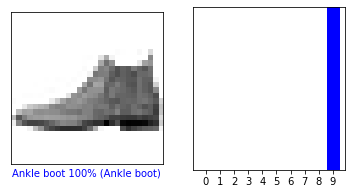

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

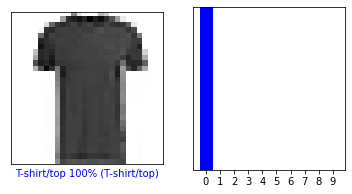

In [52]:
i = 88
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

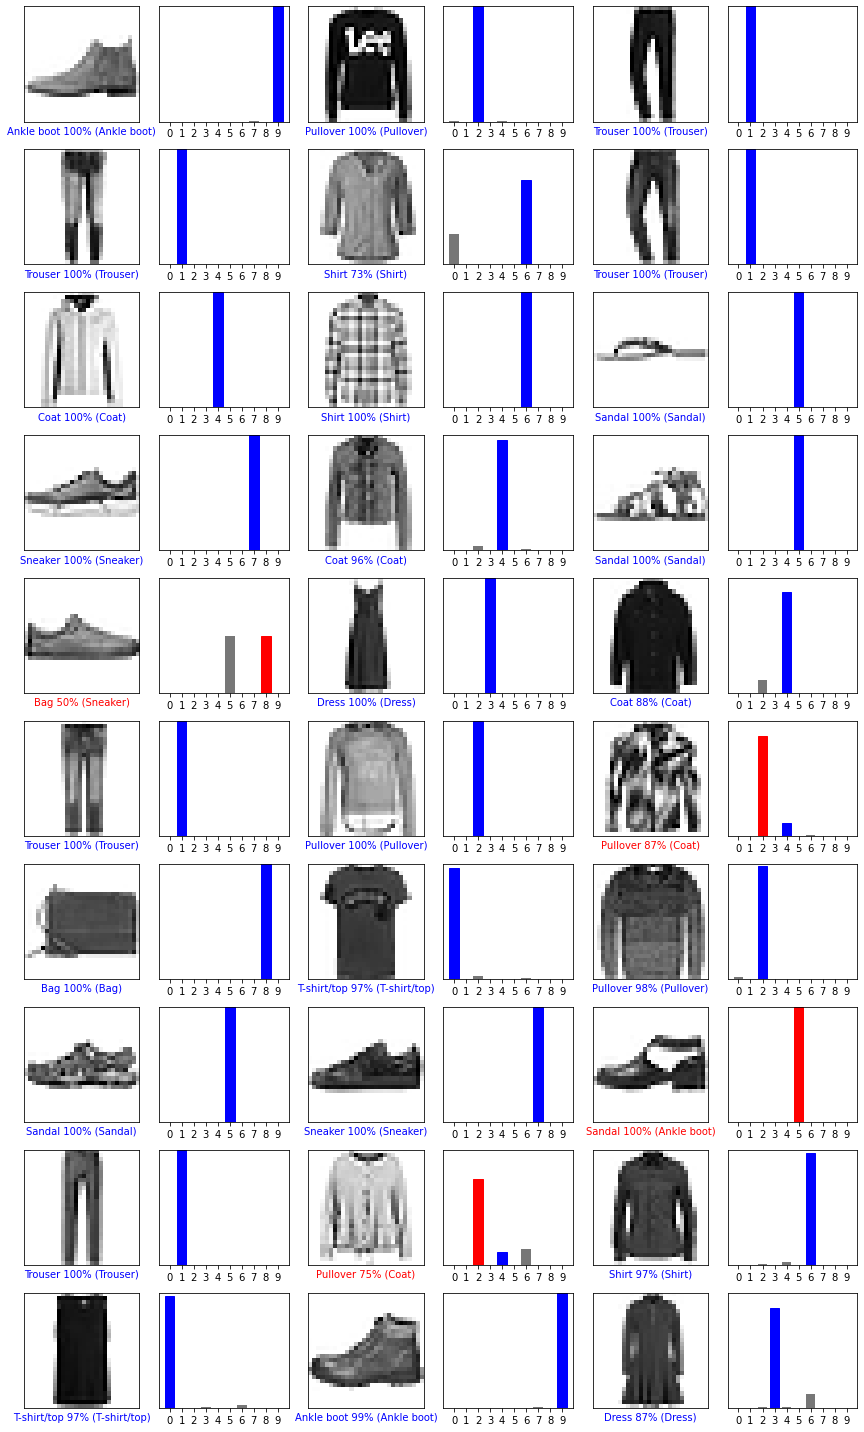

In [53]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()